# Масштабно-инвариантная трансформация признаков
Используем SIFT (Scale-Invariant Feature Transform) для обнаружения ключевых точек для контуров ног на фотографии.

Изображение: https://video.ittensive.com/machine-vision/feet.example.jpg

![Мастабно-инвариантная трансформация](sift.png)
![Мастабно-инвариантная трансформация](sift.jpg)

### Подключение библиотек

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Загрузка изображения

In [2]:
image = cv2.imread("feet.example.jpg")

In [3]:
def show_image (img, gray=False):
    fig = plt.figure(figsize=(16,8))
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap="Greys")
    else:
        plt.imshow(img[...,::-1])
    plt.show()

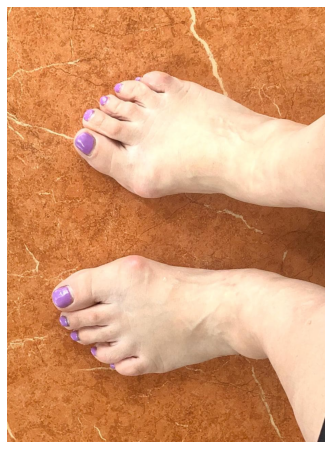

In [4]:
show_image(image)

### SIFT
Распознаем ключевые точки на изображении - носители "особенностей"

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

In [6]:
kp, des = sift.detectAndCompute(image, None)

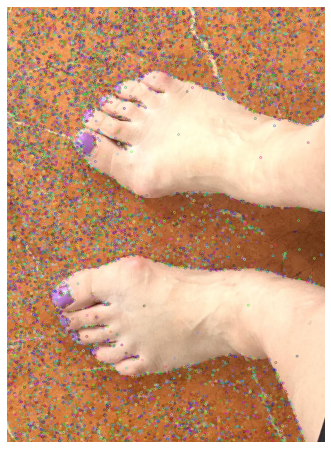

In [7]:
img = image.copy()
img = cv2.drawKeypoints(img, kp, img)
show_image(img)

### Ключевые точки
Это вектора 128x1, расположенные на изображении в точке (x,y) на масштабе (octave) под углом (angle) окрестностью (size) уровня (response)

In [8]:
for k in dir(kp[0]):
    if '_' not in k:
        print (k, getattr(kp[0], k))

angle 99.439208984375
convert <built-in method convert of type object at 0x00007FF80A162770>
octave 8913407
overlap <built-in method overlap of type object at 0x00007FF80A162770>
pt (2.342031955718994, 733.7755126953125)
response 0.028616292402148247
size 2.0305697917938232


In [9]:
print (des.shape)
print (des[0])

(13296, 128)
[ 54.  76.  44.   6.   1.   1.   5.  41.  14.  66.  98.  70.   2.   1.
  13.  28.  11.  10.  62. 129.  53.  13.   9.   8.   3.  12.  25.  32.
  29.  38.   9.   3.  18. 116.  86.  42.  22.   9.  39.  21.  23.  81.
 129. 129.  22.  15.   9.   9. 129.  64.  80.  80.   7.  11.  10.  28.
  34.  10.   4.  12.  87.  64.  14.   9.  11.   6.   2.   5.  14.  80.
 129.  84.  18.   5.   7.  32.  45. 129.  80.  35. 129.  20.   7.   8.
   4.  11.  19.  81.  16.  10.   7.  16.  40.   5.   0.   2.   4.   0.
   0.   0.   1.  13.  20.  17.   0.   0.   0.   0.   4.  24.   5.   1.
   1.   0.   0.   0.   0.   1.   1.   2.   0.   0.   0.   0.   0.   0.
   0.   0.]


(204.64920043945312, 970.403564453125) 2.15710711479187 0.0556512251496315
(271.447998046875, 870.8408203125) 7.895304203033447 0.06573174893856049
(308.4008483886719, 1053.911376953125) 2.039973258972168 0.05395618453621864
(328.2172546386719, 400.8125915527344) 17.075719833374023 0.0683290958404541
(328.2172546386719, 400.8125915527344) 17.075719833374023 0.0683290958404541
(343.85650634765625, 411.6930847167969) 4.010597229003906 0.0502876453101635
(370.2776794433594, 275.7980651855469) 10.56512451171875 0.06164387986063957
(377.9358215332031, 1030.4345703125) 5.265477180480957 0.06001071631908417
(414.2469787597656, 1162.9066162109375) 1.9479150772094727 0.05762403458356857
(414.2469787597656, 1162.9066162109375) 1.9479150772094727 0.05762403458356857
(442.63397216796875, 249.8436279296875) 5.145360469818115 0.054169926792383194
(452.7586975097656, 250.09219360351562) 4.114260673522949 0.05837522819638252
(458.7314147949219, 250.7524871826172) 3.844038486480713 0.050804637372493744

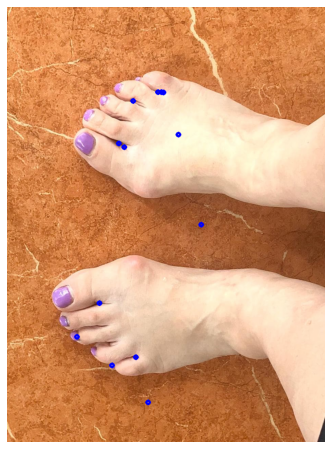

In [10]:
img = image.copy()
for i in range(len(kp)):
    if kp[i].response > 0.05:
        print (kp[i].pt, kp[i].size, kp[i].response)
        img = cv2.circle(img, tuple(np.round(kp[i].pt).astype(np.uint32)), 5, (255, 0, 0), 5)
show_image(img)

### Фильтрация изображения
Размер 128x128, серая палитра, открытие, бинаризация по Оцу

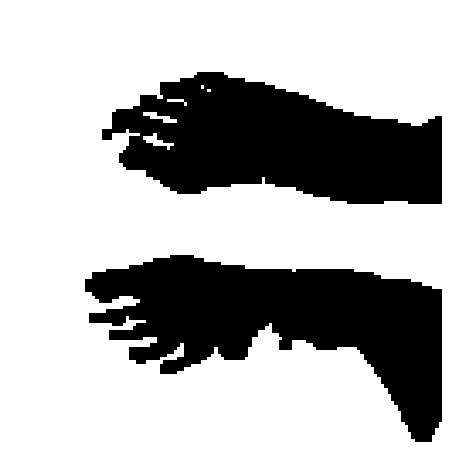

In [11]:
image_gray = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (128,128))
image_gray = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, np.ones((3,3)), iterations = 1)
otsu, image_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
show_image(image_thresh, True)

In [12]:
kp2, des2 = sift.detectAndCompute(image_thresh, None)

(24.205078125, 81.81332397460938) 2.6319832801818848 0.10284004360437393
(27.922584533691406, 81.38292694091797) 5.980315685272217 0.11989010125398636
(29.1267032623291, 37.33854293823242) 2.090956926345825 0.16264288127422333
(29.1267032623291, 37.33854293823242) 2.090956926345825 0.16264288127422333
(29.1267032623291, 37.33854293823242) 2.090956926345825 0.16264288127422333
(29.1267032623291, 37.33854293823242) 2.090956926345825 0.16264288127422333
(31.100765228271484, 96.38896179199219) 2.0592563152313232 0.13755041360855103
(33.650020599365234, 32.884464263916016) 4.390995025634766 0.1096019446849823
(33.67909240722656, 38.89222717285156) 3.2778713703155518 0.11472585052251816
(35.7867431640625, 93.10371398925781) 2.304682970046997 0.1496334969997406
(35.7867431640625, 93.10371398925781) 2.304682970046997 0.1496334969997406
(38.35500717163086, 102.28740692138672) 3.313326358795166 0.12908542156219482
(41.297176361083984, 98.06076049804688) 2.3535025119781494 0.14279432594776154
(41

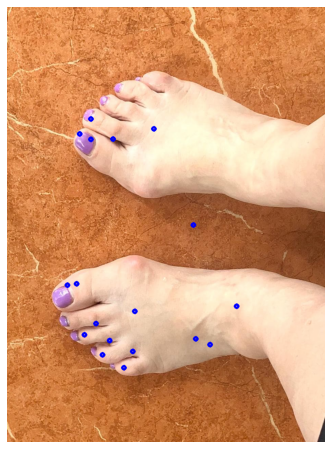

In [13]:
img = image.copy()
for i in range(len(kp2)):
    if kp2[i].response > 0.1:
        print (kp2[i].pt, kp2[i].size, kp2[i].response)
        xy = np.array(kp2[i].pt)
        xy[0] *= img.shape[1]/128
        xy[1] *= img.shape[0]/128
        img = cv2.circle(img, tuple(np.round(xy).astype(np.uint32)), 5, (255,0,0), 5)
show_image(img)